In [10]:
from experiment_utils import generate_blob_data, add_noise, get_graph, get_graph_magic, visuallize_graph, denoise_experiment, compare_denoised_signal
import numpy as np
from sklearn.datasets import make_blobs
## the output seems to be too much for this notebook, disabling tqdm.
from tqdm import tqdm
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True) 

In [11]:
np.random.seed(32)
adata = generate_blob_data(n_cells=1000, n_genes=500, n_clusters=3, cluster_std=10.0, center_box=(-5, 5))

Running MAGIC on 1000 cells and 500 genes.
Calculating graph and diffusion operator...
  Calculating PCA...
  Calculated PCA in 0.08 seconds.
  Calculating KNN search...


/home/xs272/myconda/conda_envs/sc/lib/python3.10/site-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


  Calculated KNN search in 0.17 seconds.
  Calculating affinities...
  Calculated affinities in 0.13 seconds.
Calculated graph and diffusion operator in 0.39 seconds.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


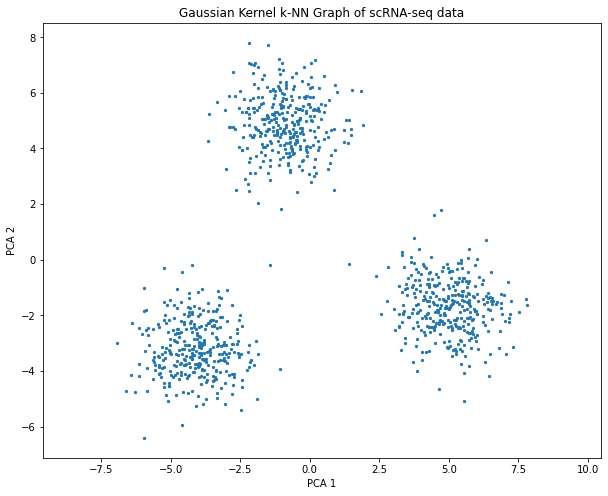

In [12]:
visuallize_graph(get_graph_magic(adata))

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/Spectral-Denoising/experiment_utils.py:109: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  graph = adata.uns['neighbors']['connectivities']


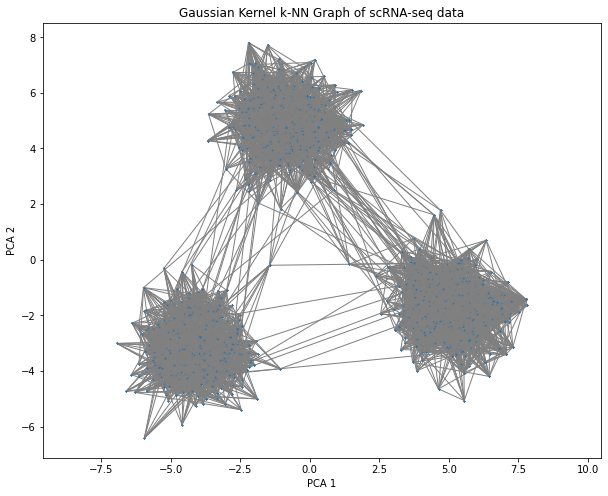

In [13]:
visuallize_graph(get_graph(adata))

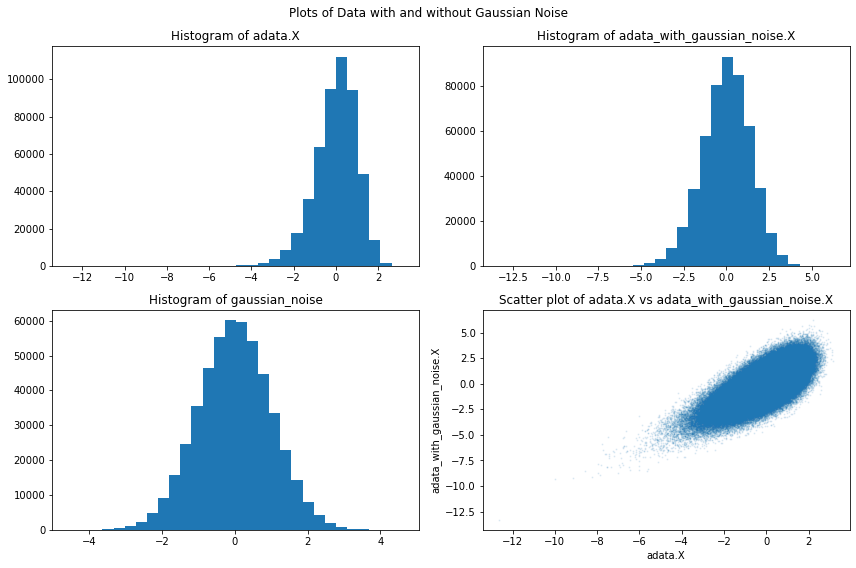

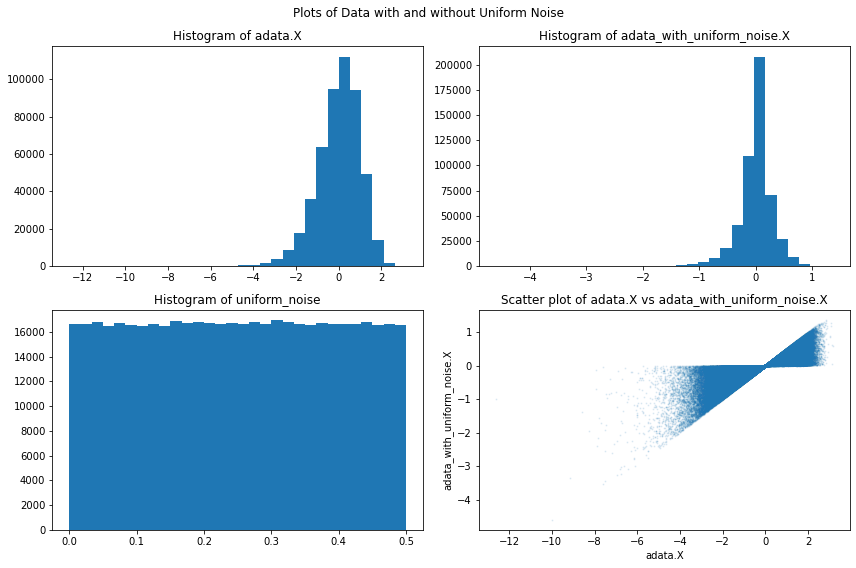

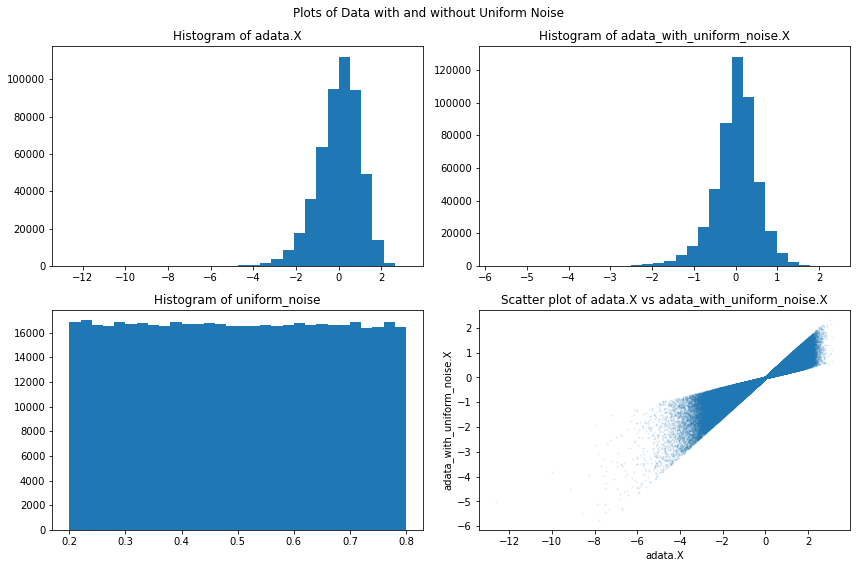

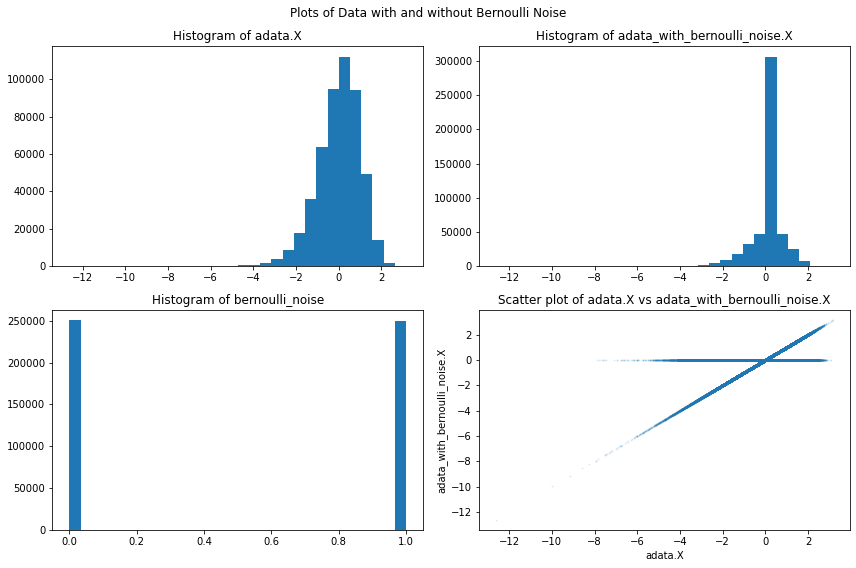

In [14]:
adata_gaussian = add_noise(adata, noise_type='gaussian', mean=0, std=1, noise_scale=1)
adata_uniform1 = add_noise(adata, noise_type='uniform', low=0, high=0.5)
adata_uniform2 = add_noise(adata, noise_type='uniform', low=0.2, high=0.8)
adata_bernoulli = add_noise(adata, noise_type='bernoulli', probability=0.5)

Running MAGIC on 1000 cells and 500 genes.
Calculating graph and diffusion operator...
  Calculating PCA...
  Calculated PCA in 0.23 seconds.
  Calculating KNN search...
  Calculated KNN search in 0.12 seconds.
  Calculating affinities...
  Calculated affinities in 0.12 seconds.
Calculated graph and diffusion operator in 0.50 seconds.


2023-04-27 12:08:06,623:[WARNING](pygsp.graphs.graph.lmax): The largest eigenvalue G.lmax is not available, we need to estimate it. Explicitly call G.estimate_lmax() or G.compute_fourier_basis() once beforehand to suppress the warning.


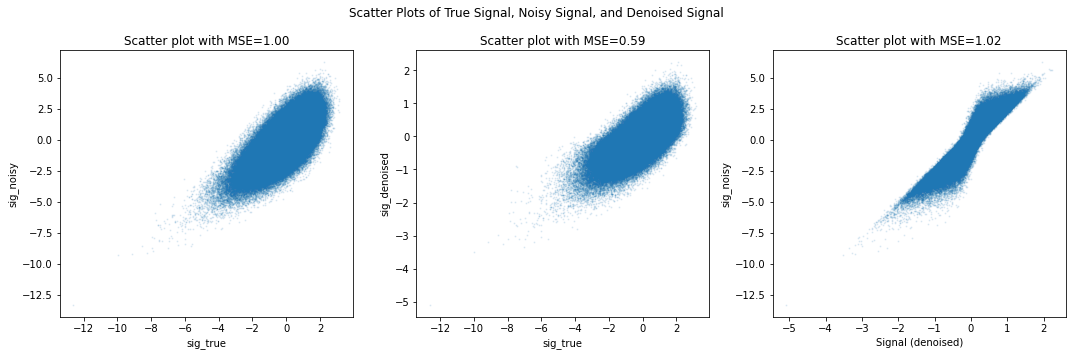

In [15]:
# pygsp_graph = get_graph(adata_gaussian)
pygsp_graph = get_graph_magic(adata_gaussian)
sig_denoised_gaussian = denoise_experiment(pygsp_graph, adata_gaussian.X, 'gaussian')
mse_dict_gaussian = compare_denoised_signal(adata.X, adata_gaussian.X, sig_denoised_gaussian)

Running MAGIC on 1000 cells and 500 genes.
Calculating graph and diffusion operator...
  Calculating PCA...
  Calculated PCA in 0.06 seconds.
  Calculating KNN search...
  Calculated KNN search in 0.12 seconds.
  Calculating affinities...
  Calculated affinities in 0.11 seconds.
Calculated graph and diffusion operator in 0.31 seconds.


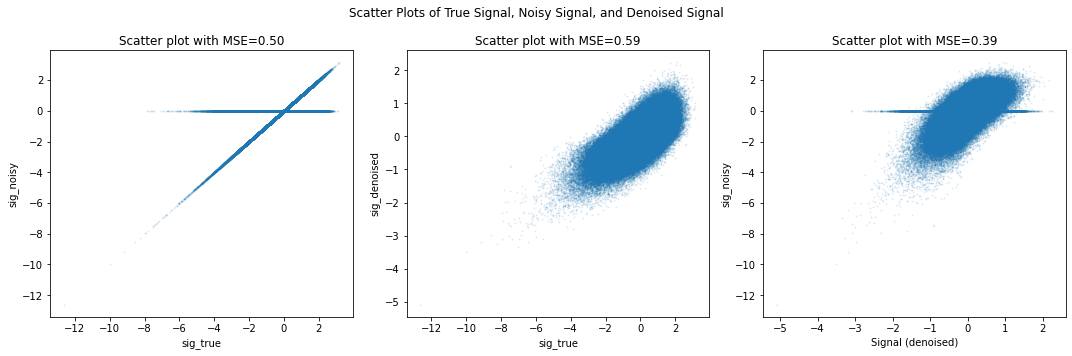

In [16]:
# pygsp_graph = get_graph(adata_bernoulli)
pygsp_graph = get_graph_magic(adata_bernoulli)
sig_denoised_bernoulli = denoise_experiment(pygsp_graph, adata_bernoulli.X, 'bernoulli')
mse_dict_bernoulli = compare_denoised_signal(adata.X, adata_bernoulli.X, sig_denoised_gaussian)

In [17]:
mse_dict_gaussian

{'MSE noisy': 1.0016468,
 'MSE denoised': 0.5901012865314922,
 'MSE denoised vs noisy': 1.0170418472524445}

In [18]:
mse_dict_bernoulli

{'MSE noisy': 0.49777067,
 'MSE denoised': 0.5901012865314922,
 'MSE denoised vs noisy': 0.39283772492498636}

Running MAGIC on 1000 cells and 500 genes.
Calculating graph and diffusion operator...
  Calculating PCA...
  Calculated PCA in 0.06 seconds.
  Calculating KNN search...
  Calculated KNN search in 0.13 seconds.
  Calculating affinities...
  Calculated affinities in 0.13 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
0.533187974902726
Truth unknown
Final Cost: [[-1122.47422812]] Achieved in 1 Iterations
Final Cost: [[-1040.59115575]] Achieved in 1 Iterations
Final Cost: [[-1201.19473893]] Achieved in 1 Iterations
Final Cost: [[-996.74212237]] Achieved in 1 Iterations
Final Cost: [[-1153.26874362]] Achieved in 1 Iterations
Final Cost: [[-1418.43639574]] Achieved in 1 Iterations
Final Cost: [[-1060.41414337]] Achieved in 1 Iterations
Final Cost: [[-1178.82010473]] Achieved in 1 Iterations
Final Cost: [[-1332.37796681]] Achieved in 1 Iterations
Final Cost: [[-1102.86594626]] Achieved in 1 Iterations
Final Cost: [[-1169.70270818]] Achieved in 1 Iterations
Final Cost: [[-1

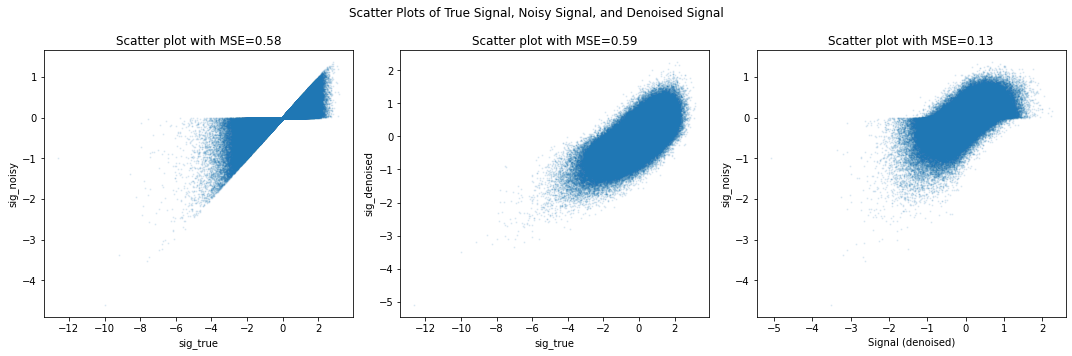

In [19]:
pygsp_graph = get_graph_magic(adata_uniform1)
sig_denoised_uniform1 = denoise_experiment(pygsp_graph, adata_uniform1.X, 'uniform')
mse_dict_uniform1 = compare_denoised_signal(adata.X, adata_uniform1.X, sig_denoised_gaussian)

In [20]:
pygsp_graph = get_graph(adata_uniform2)
sig_denoised_uniform2 = denoise_experiment(pygsp_graph, adata_uniform2.X, 'uniform')
mse_dict_uniform2 = compare_denoised_signal(adata.X, adata_uniform2.X, sig_denoised_gaussian)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/Spectral-Denoising/experiment_utils.py:109: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  graph = adata.uns['neighbors']['connectivities']


-25774.595211988257
Truth unknown


ValueError: Rank(A) < p or Rank([P; A; G]) < n

In [ ]:
import magic

Calculating MAGIC...
  Running MAGIC on 1000 cells and 500 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.47 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.19 seconds.
    Calculating affinities...
    Calculated affinities in 0.12 seconds.
  Calculated graph and diffusion operator in 0.80 seconds.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.88 seconds.


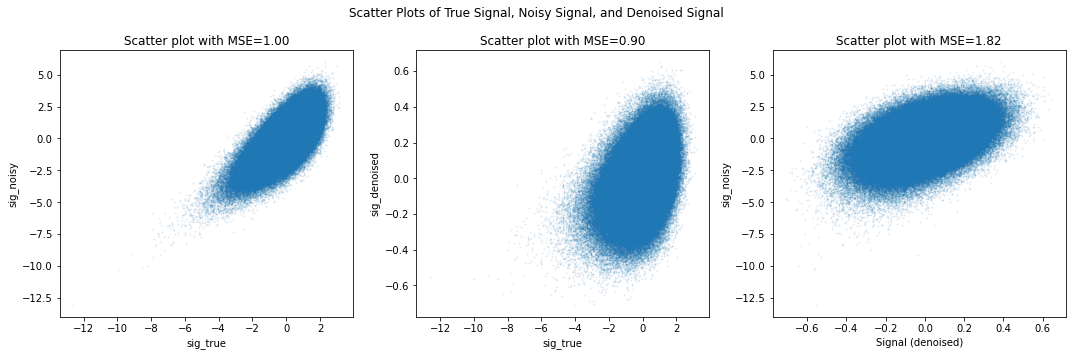

In [ ]:
magic_op = magic.MAGIC()
magic_denoised_gaussian = magic_op.fit_transform(adata_gaussian.X)
magic_mse_dict_gaussian = compare_denoised_signal(adata.X, adata_gaussian.X, magic_denoised_gaussian)

Calculating MAGIC...
  Running MAGIC on 1000 cells and 500 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.05 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.10 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 0.27 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 0.30 seconds.


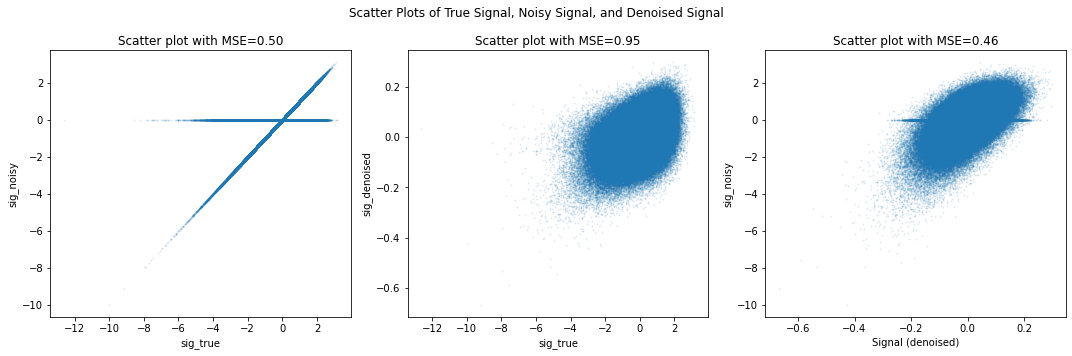

In [ ]:
magic_op = magic.MAGIC()
magic_denoised_bernoulli = magic_op.fit_transform(adata_bernoulli.X)
magic_mse_dict_bernoulli = compare_denoised_signal(adata.X, adata_bernoulli.X, magic_denoised_bernoulli)

In [ ]:
magic_op = magic.MAGIC()
magic_denoised_uniform1 = magic_op.fit_transform(adata_uniform1.X)
magic_mse_dict_uniform1 = compare_denoised_signal(adata.X, adata_uniform1.X, magic_denoised_uniform1)

NameError: name 'magic' is not defined

Calculating MAGIC...
  Running MAGIC on 1000 cells and 500 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.07 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.10 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 0.29 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 0.31 seconds.


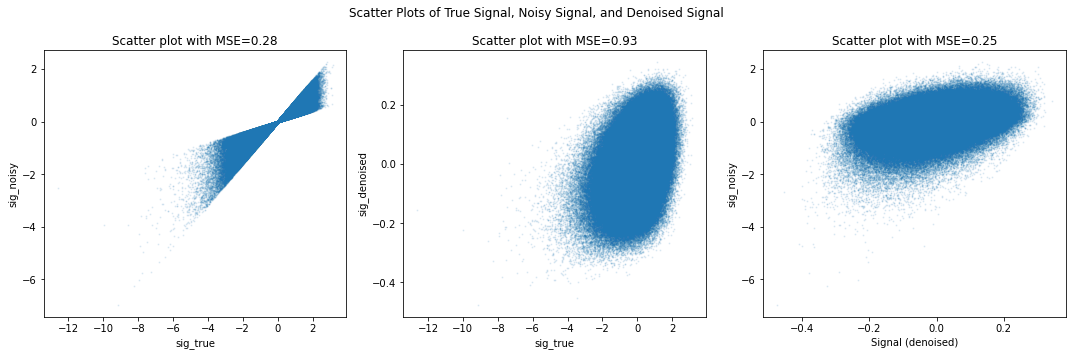

In [ ]:
magic_op = magic.MAGIC()
magic_denoised_uniform2 = magic_op.fit_transform(adata_uniform2.X)
magic_mse_dict_uniform2 = compare_denoised_signal(adata.X, adata_uniform2.X, magic_denoised_uniform2)

In [ ]:
magic_mse_dict_gaussian

{'MSE noisy': 1.0034318,
 'MSE denoised': 0.9000126774822231,
 'MSE denoised vs noisy': 1.8241447767925283}

In [ ]:
magic_mse_dict_bernoulli

{'MSE noisy': 0.500934,
 'MSE denoised': 0.9482997499555483,
 'MSE denoised vs noisy': 0.4567380247112652}